In [1]:
import scipy as sp
import scipy.stats

## 이항검정

이항분포를 이용해 베르누이 확률변수의 모수 $\mu$에 대한 가설을 조사하는 검정.

- stats 서브패키지의 binom_test 명령은 이항검정의 유의확률을 계산
- 디폴트 귀무가설 $\mu=0.5$
- x 인자값으로 [0,1,1,1,0,0,1,0,1]과 같은 데이터를 입력
- 혹은 1이 나온 횟수 $N_1$을 입력, 이 경우 시도한 횟수 $N$을 추가로 입력

In [11]:
N = 10
mu = 0.5
rv = sp.stats.bernoulli(mu)
x = rv.rvs(N)
print(x)
print('1이 나온 횟수 : ',np.sum(x))

[0 1 1 1 1 1 1 0 1 0]
1이 나온 횟수 :  7


모수가 0.5인 베르누이분포를 10번 시도하면 N이 10인 이항분포가 된다. 즉, N = 10, mu = 0.5인 이항분포에서의 기댓값은 5이다.

하지만 이 경우 7이라는 값이 등장했다.

따라서 이 7이라는 검정통계량의 검정통계분포(이항분포)는 모수가 0.5가 아닌 0.7인가? 

이 문제를 binom_test 이항검정 메소드로 유의확률을 구해 해결할 수 있다.

In [14]:
sp.stats.binom_test(x.sum(), N)

0.3437499999999999

이항검정 결과 유의확률이 약 0.34로 유의수준이 일반적으로 사용되는 1%, 5%보다 크다. 따라서 귀무가설을 채택한다.

**예제 2)**

어떤 자격시험 합격자 10명 중 7명이 대학졸업자일 때 대학졸업자가 비졸업자보다 실력이 좋다고 주장할 수 있는가?

In [33]:
sp.stats.binom_test(7, 10)

0.3437499999999999

유의확률이 약 0.34%로 $\mu$가 0.5라는 귀무가설(대학졸업자와 비졸업자가 실력이 동등하다.)을 기각하지 못한다.

따라서 대학졸업자가 비졸업자보다 실력이 좋다는 주장은 유의하지 않다.

**예제 3)**

$\mu$가 0.5라고 생각되는 확률변수 데이터 수 $N$=100번 시뮬레이션하여 1이 49번 나온 경우에 대한 이항검정

In [34]:
sp.stats.binom_test(49, 100)

0.9204107626128206

유의확률이 1에 매우 가까운 값으로 `아주 그럴듯하다.` 라고 할 수 있다. 즉, 귀무가설이 맞다는 것이다.

**예제 4)**

실제 모수 $\mu_0 = 0.35$인 경우에 대해 시뮬레이션, 이항검정 귀무가설 $H_0 : \mu = 0.5$로 실시

In [36]:
N = 100
x = sp.stats.bernoulli(0.35).rvs(100)
sp.stats.binom_test(x.sum(), N)

0.0017899303914868524

유의확률이 0.0017로 귀무가설을 기각할 수 있다.

**예제 5)**

동전을 N번 던져 나오는 횟수를 측정

1. N이 10이고 유의수준은 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기할 수 있는가?

0 1 9 10 

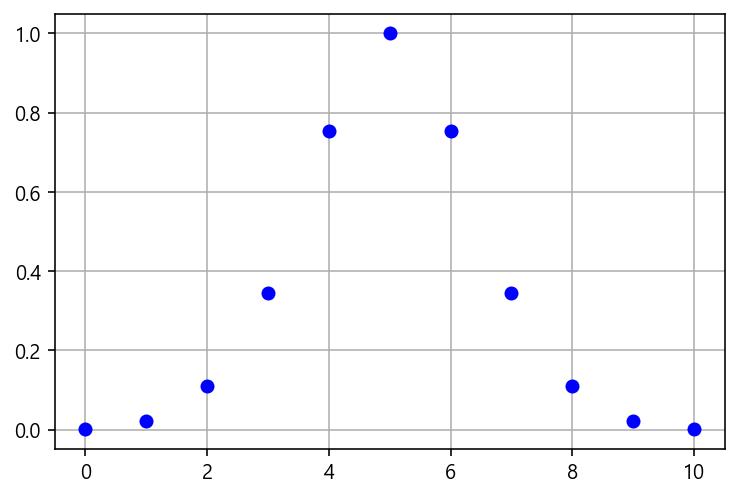

In [51]:
N = 10
for i in range(11):
    p_value = sp.stats.binom_test(i,N)
    if p_value < 0.1:
        print(i,end=' ')
    plt.plot(i, p_value, 'bo')
    plt.grid()

0, 1, 9, 10번 앞면이 나온 경우 유의확률이 0.1 미만이기에 동전이 공정하다는 귀무가설을 기각할 수 있다.

2. N-1000, 유의수준 = 10%, 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있는가?

이 때 1~N의 횟수 범위 중 동전이 공정하다고 이야기 할 수 있는 횟수의 범위는 N=10일 때와 비교하여 넓은가? 좁은가?

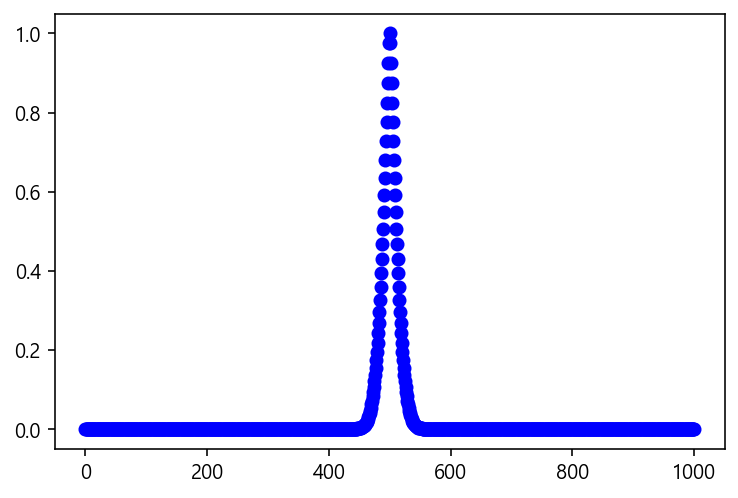

In [57]:
N = 1000
for i in range(1001):
    p_value = sp.stats.binom_test(i,N)
    plt.plot(i, p_value, 'bo')

`N=10일 때와 비교해 공정하다고 이야기 할 수 있는 범위의 폭이 좁다.`

어떤 인터넷 쇼핑몰의 상품 20개 상품평 중 '좋아요 11개', '싫어요 9개'가 존재할 때 이 상품이 좋다는 주장을 검정해라. 유의수준은 10%

In [28]:
# 좋아요, 싫어요 는 베르누이분포로 모델링
x = np.ones(11)
x2 = np.zeros(9)
xx = np.concatenate([x, x2])
print(xx), len(xx)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(None, 20)

In [116]:
sp.stats.binom_test(xx.sum(), len(xx), alternative='greater')

0.41190147399902316

유의확률이 41%로 유의수준 10%를 넘긴다. 따라서 좋아요, 싫어요의 비율이 동일하다는 귀무가설을 채택한다.

따라서 위 상품평을 통해 상품이 좋다는 주장을 하기 어렵다고 볼 수 있다.

## tips 데이터 검정

In [59]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. 여성손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [69]:
tips[tips['sex']=='Female']['smoker'].value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

위 수치만으로는 여성손님 중 흡연자가 더 많은지, 적은지 단정지을 수 없다. 따라서 검정을 통해 이에 대한 해답을 내릴 수 있다.

유의수준은 10%이다.

In [89]:
N = len(tips[tips['sex']=='Female'])
sp.stats.binom_test(54, N, alternative='greater')

0.015709055116923068

유의확률이 1.5%로 유의수준보다 낮다. 즉, 귀무가설을 기각한다. 여기서 귀무가설은 흡연자와 비흡연자의 비율이 동일하다는 것이다.


즉, 비흡연자가 흡연자보다 더 많다고 할 수 있다.

2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [84]:
tips[(tips['sex']=='Female') & (tips['time']=='Dinner')]['smoker'].value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [92]:
sp.stats.binom_test(29, 29+23, alternative='greater')

0.2442278346899461

유의확률이 24퍼센트이기 떄문에 비흡연자가 많다고 단정지을 수 없다. 귀무가설 채택(비흡연자, 흡연자의 비율이 동일하다.)

**예제 5)**

어떤 주제에 대해 찬반을 묻는 설문조사를 실시, 설문조사 결과 응답자의 70% 이상이 찬성

전체 국민의 2/3가 찬성한다는 결론을 유의수준 1%에서 얻기 위해 필요한 응답자의 수는?

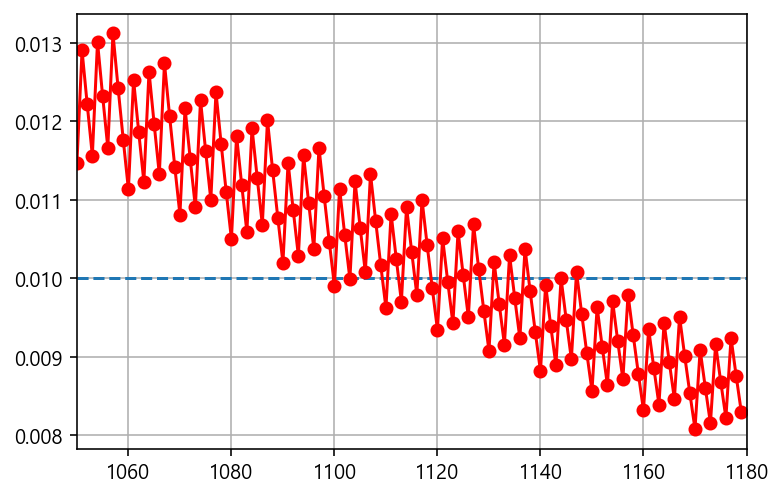

In [114]:
idx = []
p_value = []

for i in range(1050, 1180):
    idx.append(i)
    p_value.append(sp.stats.binom_test(int(i*0.7), i, p=2/3, alternative='greater'))
    
plt.plot(idx, p_value, 'ro-')
plt.hlines(y=0.01, xmin=1050, xmax=1180, ls='--')
plt.xlim(1050, 1180)
plt.grid()